# Usa baby name

The United States Social Security Administration (SSA) has made available data on thefrequency of baby names from 1880 through the present.
There are many things you might want to do with the data set:
* Visualize the proportion of babies given a particular name (your own, or anothername) over time.
* Determine the relative rank of a name.
* Determine the most popular names in each year or the names with largest increasesor decreases.
* Analyze trends in names: vowels, consonants, length, overall diversity, changes inspelling, first and last letters
* Analyze  external  sources  of  trends:  biblical  names,  celebrities,  demographicchanges

In the data, we have a series of files like **yob1880.txt**. Each of them contains 3 column about: name, sex, and births.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
columns = ['name', 'sex', 'births']

years = range(1880, 2015)
pieces = []
for year in years:
  path = 'data/names/yob%d.txt' % year
  df = pd.read_csv(path, names=columns)
  df['year'] = year
  pieces.append(df)

names = pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [6]:
total_births = pd.pivot_table(names, values = 'births', index='year', columns='sex', aggfunc=sum)
total_births

sex,F,M
year,,
1880,90992,110490
1881,91953,100743
1882,107848,113686
1883,112318,104627
1884,129020,114443
1885,133055,107799
1886,144534,110785
1887,145981,101415
1888,178624,120850


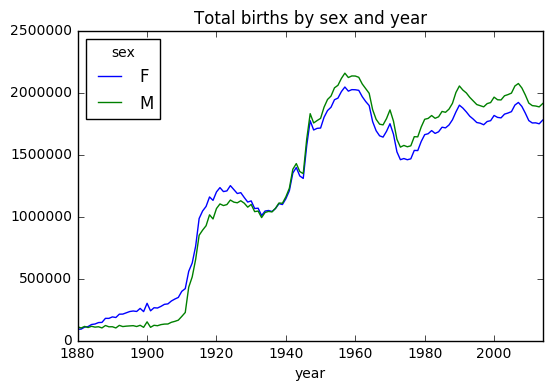

In [12]:
total_births.plot(title='Total births by sex and year')

In [13]:
def add_prop(group):
  # Integer  Division floors
  births = group.births.astype(float)
  group['prop'] = births / births.sum()
  return group
names = names.groupby(['year','sex']).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077644
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021310
4,Minnie,F,1746,1880,0.019189
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [14]:
def get_top1000(group):
  return group.sort_values(by='births', ascending=False)[:1000]
top1000 = names.groupby(['year', 'sex']).apply(get_top1000)
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077644
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021310
         4           Minnie   F    1746  1880  0.019189
         5         Margaret   F    1578  1880  0.017342
         6              Ida   F    1472  1880  0.016177
         7            Alice   F    1414  1880  0.015540
         8           Bertha   F    1320  1880  0.014507
         9            Sarah   F    1288  1880  0.014155
         10           Annie   F    1258  1880  0.013825
         11           Clara   F    1226  1880  0.013474
         12            Ella   F    1156  1880  0.012704
         13        Florence   F    1063  1880  0.011682
         14            Cora   F    1045  1880  0.011485
         15          Martha   F    1040  1880  0.011430
         16           Laura   F    1012  1880  0.011122
         17          Nellie   F     995  1880  0.010935
         18           Grace   F     982  1880  0.010792
         19          Carrie   F     949  1880  0.010429
         20           Maude   F     858  1880  0.009429
         21           Mabel   F     808  1880  0.008880
         22          Bessie   F     796  1880  0.008748
         23          Jennie   F     793  1880  0.008715
         24        Gertrude   F     787  1880  0.008649
         25           Julia   F     783  1880  0.008605
         26          Hattie   F     769  1880  0.008451
         27           Edith   F     768  1880  0.008440
         28          Mattie   F     704  1880  0.007737
         29            Rose   F     700  1880  0.007693
...                     ...  ..     ...   ...       ...
2014 M   1812683       Koen   M     215  2014  0.000113
         1812685       Mike   M     215  2014  0.000113
         1812684     Magnus   M     215  2014  0.000113
         1812682   Deangelo   M     215  2014  0.000113
         1812681  Broderick   M     215  2014  0.000113
         1812686      Bodie   M     214  2014  0.000112
         1812687      Dario   M     214  2014  0.000112
         1812688    Brayson   M     213  2014  0.000111
         1812689      Chace   M     213  2014  0.000111
         1812690    Jayvion   M     213  2014  0.000111
         1812691     Kaison   M     213  2014  0.000111
         1812692     Darien   M     212  2014  0.000111
         1812693     Teagan   M     212  2014  0.000111
         1812694   Valentin   M     212  2014  0.000111
         1812695    Bridger   M     211  2014  0.000110
         1812696   Menachem   M     211  2014  0.000110
         1812698      Rocky   M     210  2014  0.000110
         1812697      Kylen   M     210  2014  0.000110
         1812700     Foster   M     209  2014  0.000109
         1812701     Howard   M     209  2014  0.000109
         1812702     Maddux   M     209  2014  0.000109
         1812699      Boden   M     209  2014  0.000109
         1812703       Jair   M     208  2014  0.000109
         1812704    Osvaldo   M     208  2014  0.000109
         1812705       Ayan   M     207  2014  0.000108
         1812706        Ean   M     207  2014  0.000108
         1812707    Reyansh   M     207  2014  0.000108
         1812708      Tyree   M     207  2014  0.000108
         1812710      Rylen   M     206  2014  0.000108
         1812711     Sutton   M     206  2014  0.000108

[269877 rows x 5 columns]

In [ ]:
## Analyzing name tr

In [ ]:
boys = top1000[top1000.sex == 'M']
boys